In [35]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [0]:
from keras.models import Sequential#it is used to initialilze the cnn as a sequence of layers
from keras.layers import Convolution2D#it is used to add the convolution layers or different feature maps
from keras.layers import MaxPooling2D#to do max pooling of of each feature map and convert them into pooled feature map
from keras.layers import Flatten#it is used to convert all the pooled feature maps into large feature vector that then becomes the input of our fully connected layers 
from keras.layers import Dense#it is used to add the fully connected layers into the ANN

In [0]:
#importing the dataset
mnist = tf.keras.datasets.mnist #consists of 28x28 images of hand-written digits 0-9
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# scaling the data because it is easier for nn to learn
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

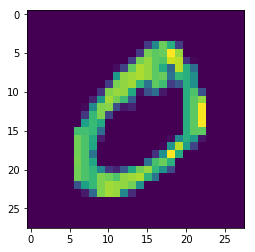

In [29]:
import matplotlib.pyplot as plt
plt.imshow(X_train[1])
plt.show()

In [0]:
#Initialising the CNN
model = Sequential()

model.add(Flatten())

#Adding 1st hidden layer
model.add(Dense(128, activation='relu'))

#Adding 2nd hidden layer
model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [51]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 6s 102us/step - loss: 0.0523 - acc: 0.9830
Epoch 2/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.0412 - acc: 0.9864
Epoch 3/10
60000/60000 [==============================] - 6s 103us/step - loss: 0.0309 - acc: 0.9899
Epoch 4/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0252 - acc: 0.9914
Epoch 5/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0201 - acc: 0.9936
Epoch 6/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0175 - acc: 0.9942
Epoch 7/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.0149 - acc: 0.9949
Epoch 8/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.0135 - acc: 0.9952
Epoch 9/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.0122 - acc: 0.9958
Epoch 10/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.0117 - ac

In [52]:
val_loss, val_acc =model.evaluate(X_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 56us/step
0.13242371306104142 0.9751


In [0]:
#hence our test set accuracy is 97%

In [0]:
#saving our model
model.save('Number_reader.model')

In [54]:
new_model = tf.keras.models.load_model('Number_reader.model')

In [55]:
import numpy as np
predictions = new_model.predict(X_test)
print(np.argmax(predictions[0]))

7


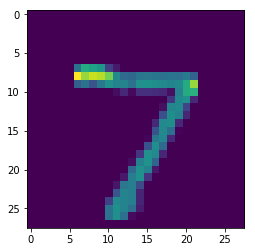

In [56]:
#lets cross check our prediction 
plt.imshow(X_test[0])
plt.show()